**Understanding The Data**
This is a fictional dataset contains sales transaction of pet products.
First, import the data and performed basic data explanatory steps.

In [1]:
import pandas as pd
pet = pd.read_csv("pet_sales.csv")
pet.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0


In [2]:
pet.describe()

,product_id,price,rating,re_buy
count,879.00000,879.000000,879.000000,879.000000
mean,4611.00000,128.212253,6.500569,0.466439
std,253.88974,71.923583,2.852835,0.499156
min,4172.00000,0.350000,1.000000,0.000000
25%,4391.50000,65.210000,5.000000,0.000000
50%,4611.00000,129.520000,6.000000,0.000000
75%,4830.50000,188.220000,10.000000,1.000000
max,5050.00000,252.690000,10.000000,1.000000


In [3]:
pet.columns

Index(['product_id', 'product_category', 'sales', 'price', 'vendor_id',
       'pet_size', 'pet_type', 'rating', 're_buy'],
      dtype='object')

In [4]:
pet.dtypes

product_id            int64
product_category     object
sales                object
price               float64
vendor_id            object
pet_size             object
pet_type             object
rating                int64
re_buy                int64
dtype: object

**Data Validation Tasks I Performed**
1. Convert Sales figures from "$120,000" to 12000 using Python.
2. Pet type should only include 'cat', 'dog', 'fish', 'bird'. Rows that indicate other pet types should not be included in the analysis. I used Excel's Data Tools 'Data Validation' to identify other pet types that should be removed from the table. First. select the 'pet type' column; second, click 'Data Validation' and set Validation criteria allow: List of 'cat', 'dog', 'fish', 'bird'; last but not least, click on 'Circle Invalid Data' and delete the rows of the other pet types.

After completed the data validation, the new dataset contains 833 entires, meaning there were 879 - 833 = 46 invalid entries of other pet types.

In [5]:
# Select sales column and remove the dollar sign and comma
pet['sales'] = pet['sales'].str.replace(',', '')
pet['sales'] = pet['sales'].str.replace('$', '')
print(pet['sales'])

0      123000
1       61000
2      218000
3       69000
4      138000
        ...  
874     27000
875     76000
876    162000
877     34000
878     54000
Name: sales, Length: 879, dtype: object


C:\Users\Selena Chu\AppData\Local\Temp\ipykernel_18600\3753669208.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pet['sales'] = pet['sales'].str.replace('$', '')


In [6]:
pet['sales'].astype('int')

0      123000
1       61000
2      218000
3       69000
4      138000
        ...  
874     27000
875     76000
876    162000
877     34000
878     54000
Name: sales, Length: 879, dtype: int32

In [7]:
# Import the validated dataset
import pandas as pd
pet = pd.read_csv("pet_sales (data validated).csv")

In [8]:
pet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        833 non-null    int64  
 1   product_category  833 non-null    object 
 2   sales             833 non-null    int64  
 3   price             833 non-null    float64
 4   vendor_id         833 non-null    object 
 5   pet_size          833 non-null    object 
 6   pet_type          833 non-null    object 
 7   rating            833 non-null    int64  
 8   re_buy            833 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 58.7+ KB


**Customer Questions**

The marketing team would like to answer the following questions to help with the decision:

1. How many products are being purchased more than once?
2. Do the products being purchased again have better sales than others?
3. What products are more likely to be purchased again for different types of pets?

In [9]:
# To answer the first business question
# Used Python code to find out the number of products that is purchased more than once

index_rebuy = pet.loc[:,'re_buy'] == 1
print(sum(index_rebuy))
index_onetime = pet.loc[:,'re_buy'] == 0
print(sum(index_onetime))

390
443


***Customer Question 1. How many products are being purchased more than once?***
Based on the result, there are 390 products with re-purchase records, and 443 one-time purchase products

***Customer Question 2. Do the products being purchased again have better sales than others?***
I generated a boxplot using Python code to show the relationship between Rebuy and Sales. To compare the difference in the medians and means of Sales of products with or without rebuy.

Based on the visualization, there is no significant difference of Means/Medians of sum of Sales between products being purchased again than the products being purchased only once. There is no correlation between Rebuy and Sales.

<function matplotlib.pyplot.show(close=None, block=None)>

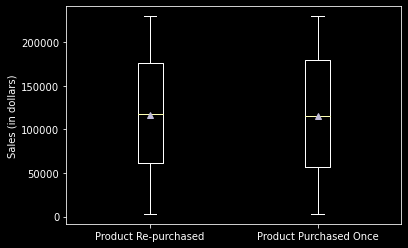

In [10]:
index_rebuy = pet.loc[:,'re_buy'] == 1
rebuy = pet.loc[index_rebuy,'sales']

index_onetime = pet.loc[:,'re_buy'] == 0
onetime = pet.loc[index_onetime,'sales']

from matplotlib import pyplot as plt

plt.boxplot([rebuy,onetime], showmeans= True)
plt.xticks([1,2],['Product Re-purchased','Product Purchased Once'])
plt.ylabel('Sales (in dollars)')
plt.show

***Customer Question 3. What Products are more likely to be purchased again for different types of pets?***
I generated a bar-stacked histogram using Python. I selected Product Category as Axis, Pet Type as Legend. And I selected those products with Rebuy records only. Based on the graph, Snack, Equipment, and Toys are the top three categories with the most frequent Rebuy transactions. Therefore, we can conclude that Snack, Equipment, and Toys are more likely to be purchased again for different types of pets.

<function matplotlib.pyplot.show(close=None, block=None)>

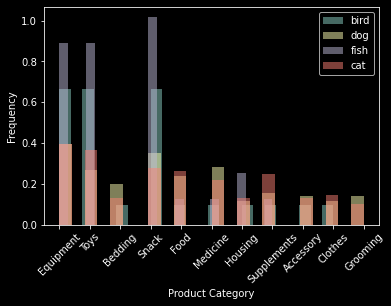

In [11]:
import matplotlib.pyplot as plt

index_rebuy = pet.loc[:,'re_buy'] == 1
bin = 24
x = pet.loc[index_rebuy, 'product_category']
dog = pet.loc[:, 'pet_type']=='dog'
y1 = x[dog]
cat = pet.loc[:, 'pet_type']=='cat'
y2 = x[cat]
fish = pet.loc[:, 'pet_type']=='fish'
y3 = x[fish]
bird = pet.loc[:,'pet_type']=='bird'
y4 = x[bird]

plt.hist(y4, bin, histtype = 'stepfilled',align = 'mid', density = True, alpha = 0.5)
plt.hist(y1, bin, histtype = 'stepfilled', align = 'mid', density = True, alpha = 0.5)
plt.hist(y3, bin, histtype = 'stepfilled', align = 'mid', density = True, alpha = 0.5)
plt.hist(y2, bin, histtype = 'stepfilled', align = 'mid', density = True, alpha = 0.5)
plt.xticks(rotation = 45)
plt.legend(["bird", "dog", "fish", "cat"])
plt.xlabel("Product Category")
plt.ylabel("Frequency")
plt.title("")
plt.show

A better way to examine which product categories has the highest number of rebuy records within different pet types is to use Pandas pivot_table function in Python. Below table shows the highest number of rebuy product is Equipment (70), and then Snack (69), and fainlly Toys (68). 

In [12]:
import numpy as np

df = pd.read_csv('pet_sales (data validated).csv', usecols=[1,6,8], parse_dates = True)
df2 = df.pivot_table(index ='product_category' ,columns ='pet_type' , values = 're_buy', aggfunc=np.sum)
df2.head(11)

pet_type,bird,cat,dog,fish
product_category,,,,
Accessory,1,9,10,0
Bedding,1,9,14,0
Clothes,1,10,8,0
Equipment,7,27,28,7
Food,1,18,17,1
Grooming,0,7,10,0
Housing,1,9,8,2
Medicine,1,15,20,1
Snack,7,19,25,8


**More Data Visualizations**

Below are a few more data visualizations to demonstrate the characteristics and the relationship between variables.

1. Boxplot generated using Python code to show the relationship between Pet Size and Sales. X Axis is Pet Size and Y Axis is Sales. It shows the Medians and Means of sum of Sales grouped by five different Pet Sizes: Extra Small, Small, Medium, Large, and Extra Large. We can see that Pet Size Large with a higher average amount of Sales.

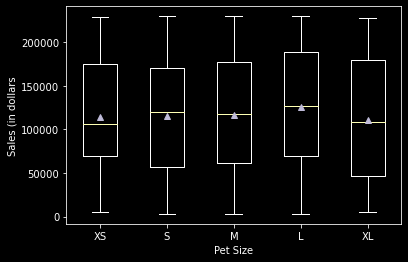

In [13]:
xs = pet.loc[:,'pet_size'] == 'extra_small'
xs_price = pet.loc[xs,'sales']

s = pet.loc[:,'pet_size'] == 'small'
s_price = pet.loc[s,'sales']

m = pet.loc[:,'pet_size'] == 'medium'
m_price = pet.loc[m,'sales']

l = pet.loc[:,'pet_size'] == 'large'
l_price = pet.loc[l,'sales']

xl = pet.loc[:,'pet_size'] == 'extra_large'
xl_price = pet.loc[xl,'sales']

plt.boxplot([xs_price,s_price,m_price,l_price,xl_price], showmeans= True)
plt.xticks([1,2,3,4,5],['XS', 'S','M','L','XL'])
plt.xlabel('Pet Size')
plt.ylabel('Sales (in dollars')
plt.show()

2. Scatterplot generated using Python code. X Axis is Product ID, Y Axis is Price, and the color bar shows Rating scale from 1 to 10. Price and Rating do not have a correlation, but Product IDs between 4500 to 5200 have a strong correlation with Rating.

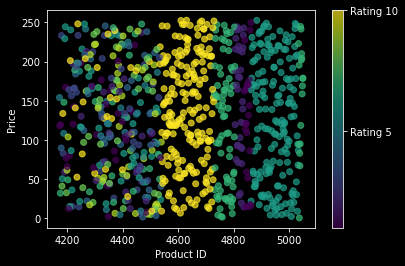

In [14]:
x = pet.loc[:,'product_id']
y = pet.loc[:,'price']
plt.scatter(x,y,c=pet.loc[:,'rating'],alpha=0.7)
cbar = plt.colorbar(ticks=[0,5,10])
cbar.set_ticklabels(['Rating 0', 'Rating 5','Rating 10'])
plt.xlabel("Product ID")
plt.ylabel("Price")
plt.show()

3. Scatterplot generated using Product ID as X Axis and Price as Y Axis. The Color indicates One-Time Buy (Purple) and Repeat Buy (Yellow). Based on the plot, Product ID between 4700 to 5200 have strong correlation with One-Time/Repeat Buy.

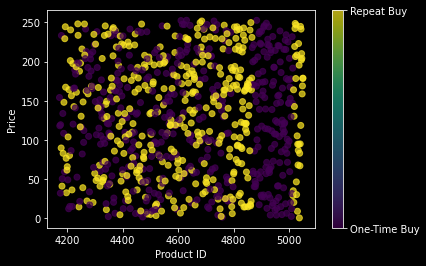

In [15]:
x = pet.loc[:,'product_id']
y = pet.loc[:,'price']
plt.scatter(x,y,c=pet.loc[:,'re_buy'],alpha=0.7)
cbar = plt.colorbar(ticks=[0,1])
cbar.set_ticklabels(['One-Time Buy', 'Repeat Buy'])
plt.xlabel("Product ID")
plt.ylabel("Price")
plt.show()